In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import json
import requests
from bs4 import BeautifulSoup
from datetime import datetime

In [107]:
url = 'https://www.banggood.com'
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')
arr = []
ul = soup.find('ul',class_='header-category-list-flex')
for x in ul.find_all('a'):
    arr.append(x['href'])
cate_urls = arr[:5]
response2 = requests.get(cate_urls[0])
s = BeautifulSoup(response2.text,'html.parser')
# s.find('div',class_='top-sellers carousel-container')
main_li = s.find_all('li',class_='product-item')
main_url_arr = []
for x in main_li:
    product_url = x.find('a')
    main_url_arr.append(product_url['href'])
for x in main_url_arr:
    response3 = requests.get(x)
    soup = BeautifulSoup(response3.text,'html.parser')
    title = soup.find('span',class_='product-title-text')
    print(title.text)
    rating = soup.find('span',class_='star-num js-star-num')
    if rating:
        print(rating.text)
    else:
        print('Null')
    prices = soup.find('span',class_='main-price')
    print(prices.text)
    reviews = soup.find('span',class_='reviews-num')
    print(reviews.text)
    link = soup.find('img',id='landingImage')
    print(link['src'])
    print('\n')
    

Z6750/Z6752/Z6753 RTR 1/64 2.4G Mini RC Car Alloy Forklift Excavator Dump Truck Support App Remote Controlled LED Light Sound Engineering Vehicle Two Speed Desktop Toys Model Collection Gift For Boys
4.83
US$00.00
63
https://imgaz1.staticbg.com/thumb/large/oaupload/banggood/images/82/37/21543a3a-ddca-422f-9b16-527e8ba287af.jpg.webp


8PCS MJX 14210 1/14 RC Car Spare Parts M4 Nuts
Null
US$00.00
0
https://imgaz.staticbg.com/thumb/large/oaupload/banggood/images/D0/3D/5467018d-1c03-4775-aa20-9cab1bf806d7.jpg.webp


GEPRC GEP M1025 Series M10 Chip GPS Module for RC Drone FPV Racing Helicopter Quadcopter RC Airplane Car
4.78
US$00.00
32
https://imgaz2.staticbg.com/thumb/large/oaupload/banggood/images/5C/78/3673a9d2-4212-4cde-9e74-8c5f25c106c0.jpg.webp


240PCS M2 M2.5 M3 Countersunk Phillips Head Screw Nuts Washers Combo Accessories Set Spare Parts for Fixed Wing RC Airplane
5
US$00.00
4
https://imgaz.staticbg.com/thumb/large/oaupload/banggood/images/67/7F/5fcb5696-60d6-48db-8f93-54ee2c9bdc3

In [ ]:
requests.get("https://www.banggood.com/Z6750-or-Z6752-or-Z6753-RTR-1-or-64-2_4G-Mini-RC-Car-Alloy-Forklift-Excavator-Dump-Truck-Support-App-Remote-Controlled-LED-Light-Sound-Engineering-Vehicle-Two-Speed-Desktop-Toys-Model-Collection-Gift-For-Boys-p-2039189.html?rmmds=ToysFlashDeals&cur_warehouse=CN&ID=6335175")

<Response [200]>

In [128]:
url = 'https://www.banggood.com'
extracted_data = []
headers = {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0 Safari/537.36",
                "Accept-Language": "en-US,en;q=0.9",
                "Referer": "https://www.google.com/"
            }
response = requests.get(url,headers=headers)
soup = BeautifulSoup(response.text,'html.parser')
arr = []
ul = soup.find('ul',class_='header-category-list-flex')
for x in ul.find_all('a'):
    arr.append(x['href'])
cate_urls = arr[:5]
for x in cate_urls:
    response2 = requests.get(x)
    s = BeautifulSoup(response2.text,'html.parser')
    # s.find('div',class_='top-sellers carousel-container')
    main_li = s.find_all('li',class_='product-item')
    main_url_arr = []
    for x in main_li:
        product_url = x.find('a')
        main_url_arr.append(product_url['href'])
    for x in main_url_arr:
        response3 = requests.get(x)
        soup = BeautifulSoup(response3.text,'html.parser')
        title = soup.find('span',class_='product-title-text')
        # print(title.text)
        rating = soup.find('span',class_='star-num js-star-num')
        if rating:
            rating = rating
        else:
            rating = 'Null'
        prices = soup.find('span',class_='main-price')
        # print(prices.text)
        reviews = soup.find('span',class_='reviews-num')
        # print(reviews.text)
        link = soup.find('img',id='landingImage')
        # print(link['src'])
        # print('\n')
        dicts={
            'product_name':title.text,
            'price':prices.text,
            'reviews':reviews.text,
            'url':link['src']
        }

        extracted_data.append(dicts)
    
extracted_data
    


ConnectionError: HTTPSConnectionPool(host='www.banggood.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001859B53EC10>: Failed to resolve 'www.banggood.com' ([Errno 11001] getaddrinfo failed)"))

In [133]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

base = "https://www.banggood.com"
extracted_data = []

# -----------------------------
# 1. Get homepage HTML
# -----------------------------
response = requests.get(base, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# -----------------------------
# 2. Extract Category URLs
# -----------------------------
cate_urls = []

ul = soup.find('ul', class_='header-category-list-flex')
if ul:
    for a in ul.find_all('a', href=True):
        full_url = urljoin(base, a['href'])
        cate_urls.append(full_url)

cate_urls = cate_urls[:]  # limit to first 5 categories

# -----------------------------
# 3. Loop through each category
# -----------------------------
for cat_url in cate_urls:
    try:
        response2 = requests.get(cat_url, headers=headers)
        s = BeautifulSoup(response2.text, 'html.parser')

        main_li = s.find_all('li', class_='product-item')

        product_links = []

        for li in main_li:
            a_tag = li.find('a', href=True)
            if a_tag:
                product_links.append(urljoin(base, a_tag['href']))

        # -----------------------------
        # 4. Visit each product page
        # -----------------------------
        for prod_url in product_links[:]:  # scrape first 10 per category (safe)
            try:
                response3 = requests.get(prod_url, headers=headers)
                product_page = BeautifulSoup(response3.text, 'html.parser')

                title = product_page.find('span', class_='product-title-text')
                title = title.text.strip() if title else "Null"

                rating = product_page.find('span', class_='star-num js-star-num')
                rating = rating.text.strip() if rating else "Null"

                price = product_page.find('span', class_='main-price')
                price = price.text.strip() if price else "Null"

                reviews = product_page.find('span', class_='reviews-num')
                reviews = reviews.text.strip() if reviews else "0"

                img = product_page.find('img', class_='product-gallery-img')
                img_url = img['src'] if img else "Null"

                extracted_data.append({
                    'product_name': title,
                    'price': price,
                    'rating': rating,
                    'reviews': reviews,
                    'image_url': img_url,
                    'product_url': prod_url
                })

            except Exception as e:
                print("Product Error:", e)
                continue

    except Exception as e:
        print("Category Error:", e)
        continue

print(extracted_data)

[{'product_name': 'Z6750/Z6752/Z6753 RTR 1/64 2.4G Mini RC Car Alloy Forklift Excavator Dump Truck Support App Remote Controlled LED Light Sound Engineering Vehicle Two Speed Desktop Toys Model Collection Gift For Boys', 'price': 'US$00.00', 'rating': '4.83', 'reviews': '63', 'image_url': 'Null', 'product_url': 'https://www.banggood.com/Z6750-or-Z6752-or-Z6753-RTR-1-or-64-2_4G-Mini-RC-Car-Alloy-Forklift-Excavator-Dump-Truck-Support-App-Remote-Controlled-LED-Light-Sound-Engineering-Vehicle-Two-Speed-Desktop-Toys-Model-Collection-Gift-For-Boys-p-2039189.html?rmmds=ToysFlashDeals&cur_warehouse=CN&ID=6335175'}, {'product_name': '8PCS MJX 14210 1/14 RC Car Spare Parts M4 Nuts', 'price': 'US$00.00', 'rating': 'Null', 'reviews': '0', 'image_url': 'Null', 'product_url': 'https://www.banggood.com/8PCS-MJX-14210-1-or-14-RC-Car-Spare-Parts-M4-Nuts-p-2035628.html?rmmds=ToysFlashDeals&cur_warehouse=CN&ID=6333237'}, {'product_name': 'GEPRC GEP M1025 Series M10 Chip GPS Module for RC Drone FPV Racing

In [197]:
df = pd.DataFrame(extracted_data)
df.drop(columns='image_url',inplace=True)
df['price'] = [random.randint(30, 100) for _ in range(len(df))]

In [198]:
df.to_csv('./output/raw.csv',index=False)

In [199]:
null_string = ["", " ", "N/A", "n/a", "NA", "None", "none", "null", "Null", "unknown", "-", "--"]

df = df.replace(null_string, np.nan)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['price'] = df['price'].fillna('unknown')

df.isnull().sum().sum()

df['price'] = pd.to_numeric(df['price'],errors='coerce').astype('Int64')
df['reviews'] = pd.to_numeric(df['reviews'],errors='coerce').astype('Int64')
df['rating'] = pd.to_numeric(df['rating'],errors='coerce')

df = df.drop_duplicates()

df

,product_name,price,rating,reviews,product_url
0,Z6750/Z6752/Z6753 RTR 1/64 2.4G Mini RC Car Al...,48,4.83,63,https://www.banggood.com/Z6750-or-Z6752-or-Z67...
1,8PCS MJX 14210 1/14 RC Car Spare Parts M4 Nuts,79,NaN,0,https://www.banggood.com/8PCS-MJX-14210-1-or-1...
2,GEPRC GEP M1025 Series M10 Chip GPS Module for...,55,4.78,32,https://www.banggood.com/GEPRC-GEP-M1025-Serie...
3,240PCS M2 M2.5 M3 Countersunk Phillips Head Sc...,92,5.00,4,https://www.banggood.com/240PCS-M2-M2_5-M3-Cou...
4,RadioMaster Radio Transmitter Large Fabric EVA...,72,4.91,157,https://www.banggood.com/RadioMaster-Radio-Tra...
...,...,...,...,...,...
475,NEXTOOL 6-in-1 1000lm Dual-light Zoomable Alar...,64,4.92,995,https://www.banggood.com/NEXTOOL-6-in-1-1000lm...
476,600LM Portable Flashligh UV Light 8 Lighting M...,31,NaN,0,https://www.banggood.com/600LM-Portable-Flashl...
477,4000K Full Spectrum LED Ceiling Lamp Modern Si...,56,5.00,1,https://www.banggood.com/4000K-Full-Spectrum-L...
478,SEEKNITE V30 1000LM EDC LED Keychain Flashligh...,75,5.00,5,https://www.banggood.com/SEEKNITE-V30-1000LM-E...


In [200]:
import re

# Clean reviews (remove non-digit chars)
def clean_reviews(x):
    x = str(x)
    num = re.sub(r"[^\d]", "", x)
    return int(num) if num else 0

df['reviews_clean'] = df['reviews'].apply(clean_reviews)

# Popularity score (0-100)
def popularity_score(row):
    rating_norm = row['rating'] / 5
    reviews_norm = min(row['reviews_clean'], 1000) / 1000
    score = (rating_norm * 0.6 + reviews_norm * 0.4) * 100
    return round(score, 2)

df['popularity_score'] = df.apply(popularity_score, axis=1)

def price_category(x):
    if x <= 50:
        return "Cheap"
    elif x <= 80:
        return "Medium"
    else:
        return "Expensive"

df['price_category'] = df['price'].apply(price_category)

# Replace NaN with 0 or appropriate default
df['reviews_clean'] = pd.to_numeric(df['reviews_clean'], errors='coerce').fillna(0)

# Make sure the dtype is float
df['reviews_clean'] = df['reviews_clean'].astype(float)


df['popularity_score'] = pd.to_numeric(df['popularity_score'], errors='coerce').fillna(0)
df['popularity_score'] = df['popularity_score'].astype(float)
df


,product_name,price,rating,reviews,product_url,reviews_clean,popularity_score,price_category
0,Z6750/Z6752/Z6753 RTR 1/64 2.4G Mini RC Car Al...,48,4.83,63,https://www.banggood.com/Z6750-or-Z6752-or-Z67...,630.0,83.16,Cheap
1,8PCS MJX 14210 1/14 RC Car Spare Parts M4 Nuts,79,NaN,0,https://www.banggood.com/8PCS-MJX-14210-1-or-1...,0.0,0.00,Medium
2,GEPRC GEP M1025 Series M10 Chip GPS Module for...,55,4.78,32,https://www.banggood.com/GEPRC-GEP-M1025-Serie...,320.0,70.16,Medium
3,240PCS M2 M2.5 M3 Countersunk Phillips Head Sc...,92,5.00,4,https://www.banggood.com/240PCS-M2-M2_5-M3-Cou...,40.0,61.60,Expensive
4,RadioMaster Radio Transmitter Large Fabric EVA...,72,4.91,157,https://www.banggood.com/RadioMaster-Radio-Tra...,1570.0,98.92,Medium
...,...,...,...,...,...,...,...,...
475,NEXTOOL 6-in-1 1000lm Dual-light Zoomable Alar...,64,4.92,995,https://www.banggood.com/NEXTOOL-6-in-1-1000lm...,9950.0,99.04,Medium
476,600LM Portable Flashligh UV Light 8 Lighting M...,31,NaN,0,https://www.banggood.com/600LM-Portable-Flashl...,0.0,0.00,Cheap
477,4000K Full Spectrum LED Ceiling Lamp Modern Si...,56,5.00,1,https://www.banggood.com/4000K-Full-Spectrum-L...,10.0,60.40,Medium
478,SEEKNITE V30 1000LM EDC LED Keychain Flashligh...,75,5.00,5,https://www.banggood.com/SEEKNITE-V30-1000LM-E...,50.0,62.00,Medium


In [214]:
df['product_name'] = df['product_name'].astype(str)
df['product_url'] = df['product_url'].astype(str)
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0.0).astype(float)
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce').fillna(0).astype(int)


In [215]:
df.to_csv('./output/clean.csv',index=False)

In [216]:
df

,product_name,price,rating,reviews,product_url,reviews_clean,popularity_score,price_category
0,Z6750/Z6752/Z6753 RTR 1/64 2.4G Mini RC Car Al...,48.0,4.83,63,https://www.banggood.com/Z6750-or-Z6752-or-Z67...,630.0,83.16,Cheap
1,8PCS MJX 14210 1/14 RC Car Spare Parts M4 Nuts,79.0,0.00,0,https://www.banggood.com/8PCS-MJX-14210-1-or-1...,0.0,0.00,Medium
2,GEPRC GEP M1025 Series M10 Chip GPS Module for...,55.0,4.78,32,https://www.banggood.com/GEPRC-GEP-M1025-Serie...,320.0,70.16,Medium
3,240PCS M2 M2.5 M3 Countersunk Phillips Head Sc...,92.0,5.00,4,https://www.banggood.com/240PCS-M2-M2_5-M3-Cou...,40.0,61.60,Expensive
4,RadioMaster Radio Transmitter Large Fabric EVA...,72.0,4.91,157,https://www.banggood.com/RadioMaster-Radio-Tra...,1570.0,98.92,Medium
...,...,...,...,...,...,...,...,...
475,NEXTOOL 6-in-1 1000lm Dual-light Zoomable Alar...,64.0,4.92,995,https://www.banggood.com/NEXTOOL-6-in-1-1000lm...,9950.0,99.04,Medium
476,600LM Portable Flashligh UV Light 8 Lighting M...,31.0,0.00,0,https://www.banggood.com/600LM-Portable-Flashl...,0.0,0.00,Cheap
477,4000K Full Spectrum LED Ceiling Lamp Modern Si...,56.0,5.00,1,https://www.banggood.com/4000K-Full-Spectrum-L...,10.0,60.40,Medium
478,SEEKNITE V30 1000LM EDC LED Keychain Flashligh...,75.0,5.00,5,https://www.banggood.com/SEEKNITE-V30-1000LM-E...,50.0,62.00,Medium


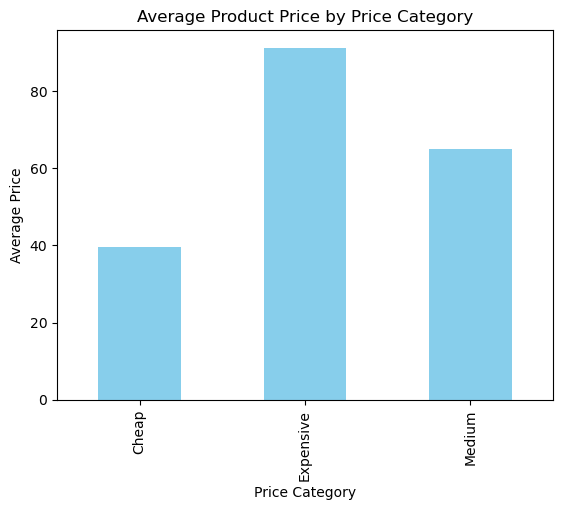

In [219]:
import matplotlib.pyplot as plt

df.groupby('price_category')['price'].mean().plot(kind='bar', color='skyblue')
plt.xlabel("Price Category")
plt.ylabel("Average Price")
plt.title("Average Product Price by Price Category")
plt.show()



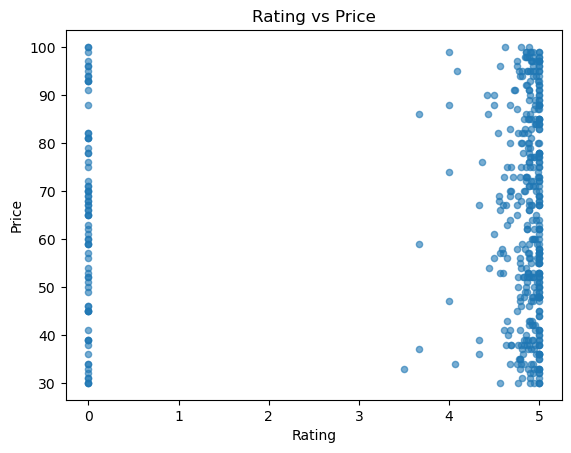

In [220]:
df.plot(kind='scatter', x='rating', y='price', alpha=0.6)
plt.title("Rating vs Price")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()


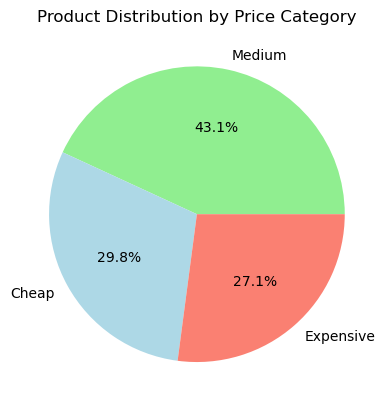

In [221]:
df['price_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','lightblue','salmon'])
plt.title("Product Distribution by Price Category")
plt.ylabel("")
plt.show()


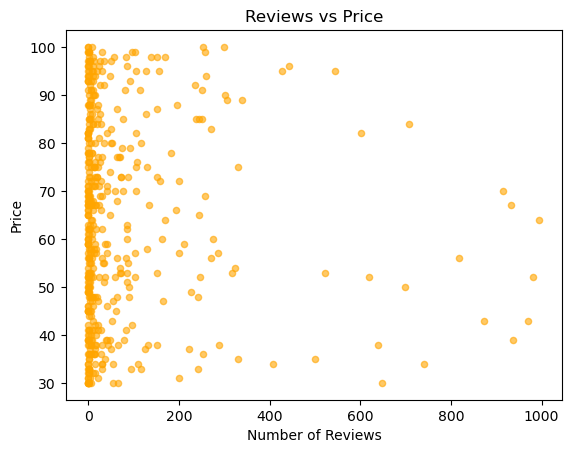

In [222]:
df.plot(kind='scatter', x='reviews', y='price', alpha=0.6, color='orange')
plt.title("Reviews vs Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()


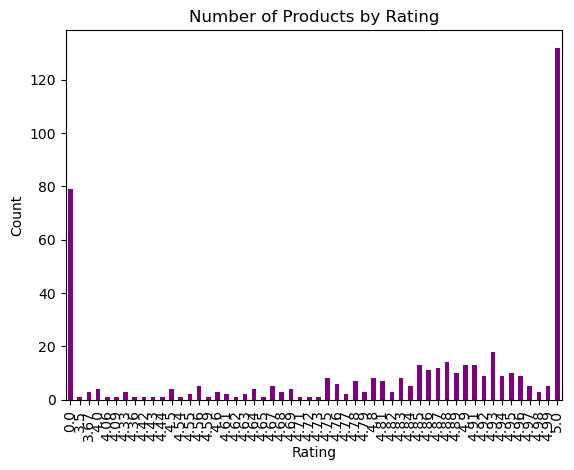

In [223]:
df['rating'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Number of Products by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [218]:
conn_str = (
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-OU7EENT;"
    "Trusted_Connection=yes;"
)

with pyodbc.connect(conn_str,autocommit=True) as conn:
    cursor = conn.cursor()
    cursor.execute('CREATE DATABASE BANGGOOD')

conn_str = (
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-OU7EENT;"
    "Trusted_Connection=yes;"
    "Database=BANGGOOD;"
)


with pyodbc.connect(conn_str,autocommit=True) as conn:
    cursor = conn.cursor()
    cursor.execute(""" CREATE TABLE ECOMMERCE (
    product_id INT IDENTITY(1,1) PRIMARY KEY,  -- Auto-increment primary key
    product_name NVARCHAR(255) NOT NULL,       -- Product name, max 255 chars
    price FLOAT NOT NULL,                       -- Price, numeric
    rating FLOAT NULL,                          -- Rating, can have decimals, allow NULL for NaN
    reviews INT NOT NULL,                       -- Reviews count
    product_url NVARCHAR(500) NOT NULL,        -- URL, allow long text
    reviews_clean FLOAT NULL,                   -- Optional: cleaned numeric reviews, if you calculate later
    popularity_score FLOAT NULL,                -- Optional: popularity metric
    price_category NVARCHAR(50) NULL            -- Optional: category string like 'Low', 'Medium', 'High'
);

""")
    
conn_str = (
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-OU7EENT;"
    "Trusted_Connection=yes;"
    "Database=BANGGOOD;"
)
    
with pyodbc.connect(conn_str) as conn:
    cursor = conn.cursor()
    for lab,val in df.iterrows():
        cursor.execute("""
            INSERT INTO ECOMMERCE 
            (product_name, price, rating, reviews, product_url, reviews_clean, popularity_score, price_category)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """,
        val['product_name'],
        val['price'],
        val['rating'],
        val['reviews'],
        val['product_url'],
        val['reviews_clean'],
        val['popularity_score'],
        val['price_category']
        )
    conn.commit()


with pyodbc.connect(conn_str) as conn:
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM ECOMMERCE')
    result = cursor.fetchall()
result

[(1, 'Z6750/Z6752/Z6753 RTR 1/64 2.4G Mini RC Car Alloy Forklift Excavator Dump Truck Support App Remote Controlled LED Light Sound Engineering Vehicle Two Speed Desktop Toys Model Collection Gift For Boys', 48.0, 4.83, 63, 'https://www.banggood.com/Z6750-or-Z6752-or-Z6753-RTR-1-or-64-2_4G-Mini-RC-Car-Alloy-Forklift-Excavator-Dump-Truck-Support-App-Remote-Controlled-LED-Light-Sound-Engineering-Vehicle-Two-Speed-Desktop-Toys-Model-Collection-Gift-For-Boys-p-2039189.html?rmmds=ToysFlashDeals&cur_warehouse=CN&ID=6335175', 630.0, 83.16, 'Cheap'),
 (2, '8PCS MJX 14210 1/14 RC Car Spare Parts M4 Nuts', 79.0, 0.0, 0, 'https://www.banggood.com/8PCS-MJX-14210-1-or-14-RC-Car-Spare-Parts-M4-Nuts-p-2035628.html?rmmds=ToysFlashDeals&cur_warehouse=CN&ID=6333237', 0.0, 0.0, 'Medium'),
 (3, 'GEPRC GEP M1025 Series M10 Chip GPS Module for RC Drone FPV Racing Helicopter Quadcopter RC Airplane Car', 55.0, 4.78, 32, 'https://www.banggood.com/GEPRC-GEP-M1025-Series-M10-Chip-GPS-Module-for-RC-Drone-FPV-Raci

In [224]:
with pyodbc.connect(conn_str) as conn:
    cursor = conn.cursor()
    cursor.execute("""SELECT price_category,
       AVG(price) AS avg_price
FROM ECOMMERCE
GROUP BY price_category
ORDER BY price_category;
""")
    result = cursor.fetchall()
result

[('Cheap', 39.48951048951049),
 ('Expensive', 91.20769230769231),
 ('Medium', 64.92753623188406)]

In [225]:
with pyodbc.connect(conn_str) as conn:
    cursor = conn.cursor()
    cursor.execute("""SELECT price_category,
       AVG(rating) AS avg_rating
FROM ECOMMERCE
GROUP BY price_category
ORDER BY price_category;
""")
    result = cursor.fetchall()
result

[('Cheap', 4.073006993006991),
 ('Expensive', 4.146538461538463),
 ('Medium', 3.9933333333333327)]

In [226]:
with pyodbc.connect(conn_str) as conn:
    cursor = conn.cursor()
    cursor.execute("""SELECT price_category,
       COUNT(*) AS product_count
FROM ECOMMERCE
GROUP BY price_category
ORDER BY price_category;
""")
    result = cursor.fetchall()
result

[('Cheap', 143), ('Expensive', 130), ('Medium', 207)]

In [228]:
with pyodbc.connect(conn_str) as conn:
    cursor = conn.cursor()
    cursor.execute("""WITH RankedReviews AS (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY price_category ORDER BY reviews DESC) AS rn
    FROM ECOMMERCE
)
SELECT price_category, product_name, reviews
FROM RankedReviews
WHERE rn <= 5
ORDER BY price_category, reviews DESC;
""")
    result = cursor.fetchall()
result

[('Cheap', 'BlitzWolf® BW-WA4 30W Wireless Speaker Portable bluetooth Speaker Double Drivers Bass TWS Stereo IPX6 Waterproof TF Card AUX Outdoors Speaker', 969),
 ('Cheap', 'LED Mirror Alarm Clock Big Screen Temperature and Humidity Display with Radio and Time Projection Function Electronic Clock Rechargeable', 936),
 ('Cheap', 'Bakeey PB-C7366 8-in-1 USB-C Hub Docking Station Adapter With 4K HDMI HD Display / 87W USB-C PD3.0 Power Delivery / USB-C Data Transmission / 2 * USB 3.0 / RJ45 Ethernet / Memory Card Readers', 873),
 ('Cheap', 'Wnew 2PCS/4PCS MFT Table Clamps Bench Dog Clamps Quick Ratchet Release Speed Squeeze Woodworking Clamp for Workbench 20mm Dog Hole', 741),
 ('Cheap', 'MJX HYPER GO 16208 16209 1/16 Brushless High Speed RC Car Vehicle Models 45km/h', 698),
 ('Expensive', 'ATuMan DUKA LS-P Intelligent Digital Laser Rangefinder Rechargeable Hunting Golf Distance Meter Range Finder', 707),
 ('Expensive', 'Elfeland 100 LED Solar Power Waterproof IP65 PIR Motion Sensor Solar 